In [5]:
import pandas as pd
from datetime import datetime, timezone


def utc_timestamp_to_date_str(ts):
    utc_date = datetime.fromtimestamp(ts, tz=timezone.utc)
    return utc_date.strftime("%Y-%m-%d")


def data_clean(df):
    df.drop(index=0, inplace=True)
    df["date_str"] = df["date"].apply(utc_timestamp_to_date_str)

    df["high"] = df["high"].astype(float)
    df["low"] = df["low"].astype(float)
    df["btc_eth_low"] = 1 / df["high"]
    df["btc_eth_high"] = 1 / df["low"]
    df["tvlUSD"] = df["tvlUSD"].astype(float)
    df["feesUSD"] = df["feesUSD"].astype(float)
    df["fees_rate"] = df["feesUSD"] / df["tvlUSD"] * 100

    analysis_df = df[["date_str", "feesUSD", "btc_eth_low", "btc_eth_high", "fees_rate"]]
    analysis_df.rename(columns={"date_str": "date", "feesUSD": "fees_usd"}, inplace=True)
    return analysis_df


csv_file = "../data/wbtc_eth_0.3_uniswap_data.csv"
pool_df = pd.read_csv(csv_file)
df = data_clean(pool_df)
df.head()

/var/folders/sj/9n8j6m2s6_1g9x78vzd8z0rm0000gn/T/ipykernel_36654/2277948466.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df.rename(columns={"date_str": "date", "feesUSD": "fees_usd"}, inplace=True)


,date,fees_usd,btc_eth_low,btc_eth_high,fees_rate
1,2021-05-05,1477.597347,16.081657,16.770106,0.016867
2,2021-05-06,22523.861295,15.962271,16.727511,0.065101
3,2021-05-07,32911.554663,16.107086,16.590368,0.073007
4,2021-05-08,69820.047586,14.999342,16.638644,0.131555
5,2021-05-09,72456.137750,14.619351,15.305329,0.118723


In [8]:
csv_file = "../data/wbtc_eth_0.05_uniswap_data.csv"
low_pool_df = pd.read_csv(csv_file)
low_df = data_clean(low_pool_df)
low_df.head()

/var/folders/sj/9n8j6m2s6_1g9x78vzd8z0rm0000gn/T/ipykernel_36654/2277948466.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df.rename(columns={"date_str": "date", "feesUSD": "fees_usd"}, inplace=True)


,date,fees_usd,btc_eth_low,btc_eth_high,fees_rate
1,2021-05-06,0.551016,16.016261,16.670404,0.010706
2,2021-05-07,1961.131810,16.119301,16.638702,0.094585
3,2021-05-08,3721.809163,14.992656,16.654496,0.187921
4,2021-05-09,317.441685,14.640555,15.294068,0.042913
5,2021-05-10,78.305989,13.632289,15.189209,0.010764


In [27]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
df.describe()

,fees_usd,btc_eth_low,btc_eth_high,fees_rate
count,732.0000,732.0000,732.0000,732.0000
mean,88949.5025,14.2666,14.6474,0.0398
std,88782.5564,1.3452,1.4443,0.0505
min,205.4061,11.3552,11.5767,0.0001
25%,39172.8508,13.3842,13.6506,0.0157
50%,68402.4433,14.1178,14.4688,0.0274
75%,111327.5423,14.8696,15.2740,0.0455
max,943943.7763,18.8618,20.3314,0.5512


In [16]:
low_df.describe()

,fees_usd,btc_eth_low,btc_eth_high,fees_rate
count,731.000000,731.000000,731.000000,731.000000
mean,33377.811929,14.188393,14.753928,0.065588
std,35861.156559,1.437371,1.480865,0.359898
min,0.000000,4.633404,11.885698,0.000000
25%,14265.770269,13.341924,13.715003,0.020465
50%,24148.128988,14.067734,14.528774,0.037400
75%,37508.032306,14.833511,15.377228,0.062385
max,318336.654911,18.843670,22.056444,9.637274


In [28]:
low_df[low_df["date"] > "2022-05-06"].describe()

,fees_usd,btc_eth_low,btc_eth_high,fees_rate
count,365.0000,365.0000,365.0000,365.0000
mean,42824.2247,14.3255,14.8511,0.0435
std,45842.4587,1.6243,1.5641,0.0488
min,2920.7576,4.6334,11.9447,0.0025
25%,16068.8970,13.3824,13.7989,0.0152
50%,27114.6707,14.2028,14.5640,0.0290
75%,46560.5648,14.8636,15.3358,0.0529
max,318336.6549,18.8437,21.2848,0.4058


In [29]:
df[df["date"] > "2022-05-06"].describe()

,fees_usd,btc_eth_low,btc_eth_high,fees_rate
count,365.0000,365.0000,365.0000,365.0000
mean,74352.5882,14.4485,14.7776,0.0328
std,73438.8569,1.4495,1.5544,0.0342
min,205.4061,11.7265,11.9094,0.0001
25%,28997.0939,13.4386,13.7159,0.0121
50%,54528.9756,14.2454,14.5227,0.0217
75%,99032.2095,14.8978,15.2363,0.0445
max,633068.9905,18.8618,20.3314,0.3090


In [35]:
low_df[low_df["date"] > "2023-03-31"].describe()

,fees_usd,btc_eth_low,btc_eth_high,fees_rate
count,36.0000,36.0000,36.0000,36.0000
mean,21010.7811,14.9582,15.2503,0.0176
std,12134.3109,0.4091,0.4149,0.0103
min,6282.5759,14.1100,14.4114,0.0051
25%,11617.2059,14.7270,14.9318,0.0101
50%,17569.4276,15.0230,15.3108,0.0152
75%,26235.9856,15.3039,15.5322,0.0222
max,61122.7663,15.5965,16.0789,0.0533


In [37]:
df[df["date"] > "2022-12-31"].describe()

,fees_usd,btc_eth_low,btc_eth_high,fees_rate
count,126.0000,126.0000,126.0000,126.0000
mean,49063.3513,14.4509,14.6684,0.0186
std,39351.9090,0.7178,0.7545,0.0150
min,205.4061,12.9118,13.0262,0.0001
25%,23870.9469,13.9828,14.2579,0.0095
50%,38546.0514,14.3868,14.5722,0.0153
75%,61736.7336,15.0452,15.3231,0.0228
max,229073.7363,15.7656,16.0386,0.0842


In [13]:
low_df.tail()

,date,fees_usd,btc_eth_low,btc_eth_high,fees_rate
727,2023-05-02,13137.087053,15.295735,15.390988,0.010313
728,2023-05-03,17388.845004,15.108716,15.365383,0.013454
729,2023-05-04,8818.670862,15.250964,15.373443,0.006925
730,2023-05-05,20536.642834,14.866583,15.426031,0.016093
731,2023-05-06,12258.421379,14.852707,15.107345,0.009902


In [22]:
low_df[low_df["date"] > "2021-05-30"].head(20)

,date,fees_usd,btc_eth_low,btc_eth_high,fees_rate
26,2021-05-31,187.06,13.89,15.10,0.10
27,2021-06-01,72.09,13.77,15.73,0.05
28,2021-06-02,15.84,13.68,14.05,0.01
29,2021-06-03,71.64,13.52,15.81,0.03
30,2021-06-04,32.93,13.63,14.06,0.02
31,2021-06-05,11.61,13.43,13.75,0.01
32,2021-06-06,8.80,13.23,13.64,0.00
33,2021-06-07,931.58,12.07,13.26,0.65
34,2021-06-08,13019.37,12.95,13.90,9.64
35,2021-06-09,332.45,13.26,15.16,0.11


In [20]:
# merge low_df and df
pd.set_option('display.float_format', lambda x: '%.4f' % x)

merge_df = pd.merge(df, low_df, on="date", suffixes=("", "_0.05"))
merge_df["volume"] = merge_df["fees_usd"] / 0.003 + merge_df["fees_usd_0.05"] / 0.0005
merge_df.head()

,date,fees_usd,btc_eth_low,btc_eth_high,fees_rate,fees_usd_0.05,btc_eth_low_0.05,btc_eth_high_0.05,fees_rate_0.05,volume
0,2021-05-06,22523.86,15.96,16.73,0.07,0.55,16.02,16.67,0.01,7509055.80
1,2021-05-07,32911.55,16.11,16.59,0.07,1961.13,16.12,16.64,0.09,14892781.84
2,2021-05-08,69820.05,15.00,16.64,0.13,3721.81,14.99,16.65,0.19,30716967.52
3,2021-05-09,72456.14,14.62,15.31,0.12,317.44,14.64,15.29,0.04,24786929.29
4,2021-05-10,174519.67,13.55,15.05,0.28,78.31,13.63,15.19,0.01,58329835.62


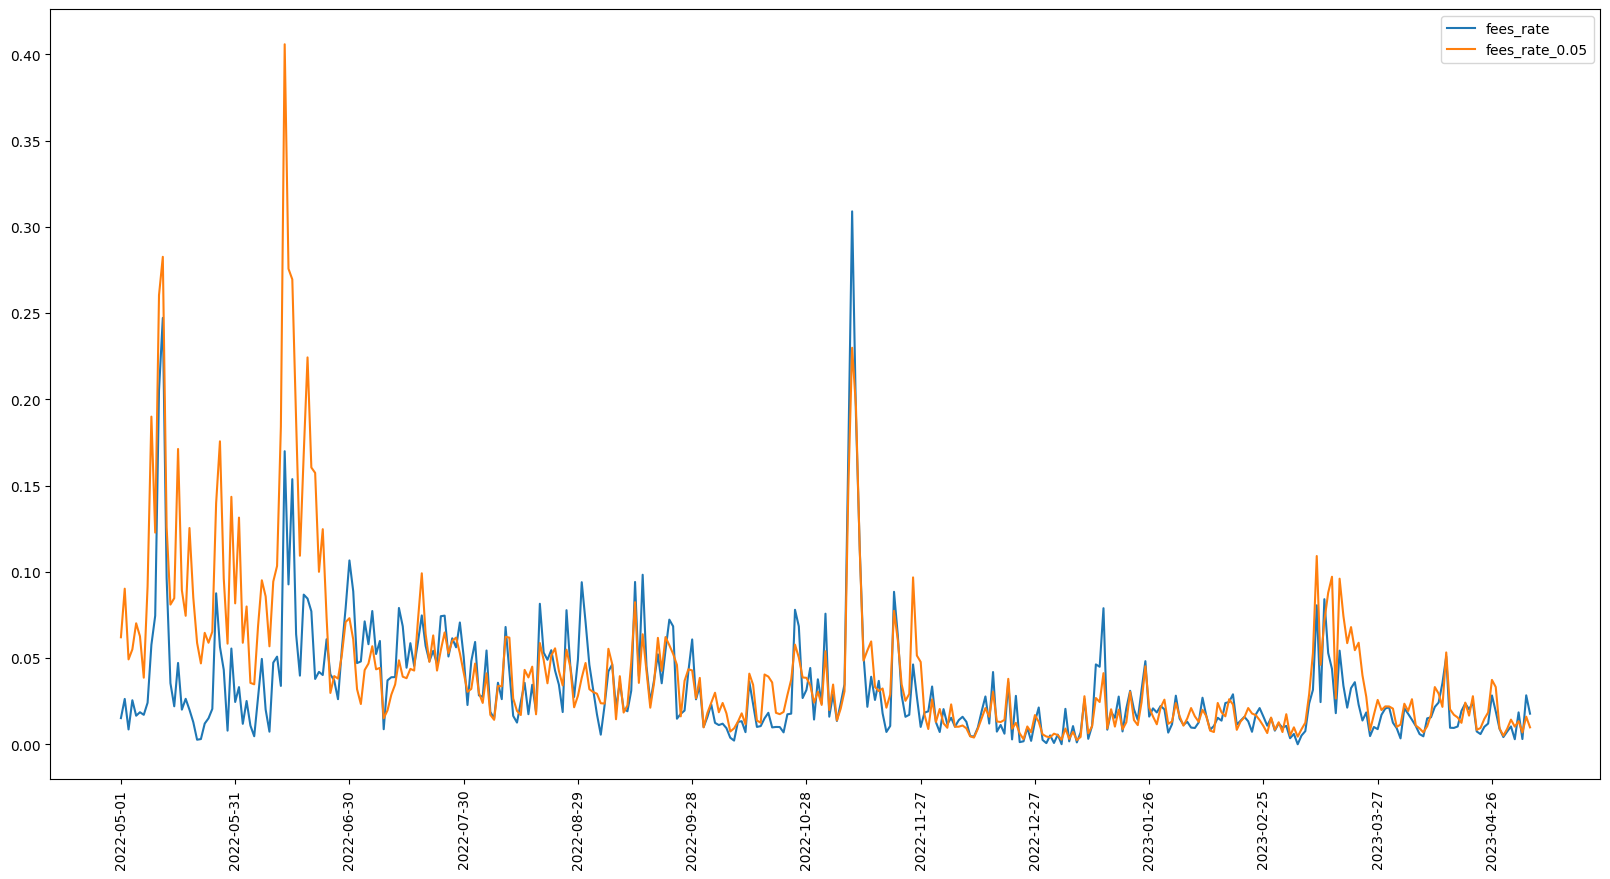

In [38]:
import matplotlib.pyplot as plt

plot_df = merge_df[merge_df["date"] > "2022-04-30"]

plt.figure(figsize=(20, 10))
plt.plot(plot_df["date"], plot_df["fees_rate"], label="fees_rate")
plt.plot(plot_df["date"], plot_df["fees_rate_0.05"], label="fees_rate_0.05")
plt.xticks(plot_df["date"][::30], rotation=90)
plt.legend()

# ax2 = plt.twinx()
# plt.plot(plot_df["date"], plot_df["volume"], label="volume", color="red")
# plt.xticks(plot_df["date"][::30], rotation=90)
# plt.legend()

plt.show()

In [41]:
merge_df.tail(30)

,date,fees_usd,btc_eth_low,btc_eth_high,fees_rate,fees_usd_0.05,btc_eth_low_0.05,btc_eth_high_0.05,fees_rate_0.05,volume
701,2023-04-07,19692.3594,14.9852,15.0467,0.0060,9843.9936,14.9251,15.0833,0.0093,26252107.0441
702,2023-04-08,15399.7972,15.0079,15.0871,0.0047,7409.4417,14.9888,15.1248,0.0070,19952149.0676
703,2023-04-09,50066.6736,15.0884,15.2363,0.0151,11238.1172,15.0995,15.2974,0.0105,39165125.5425
704,2023-04-10,53880.8872,15.2216,15.5144,0.0157,18981.3941,15.2046,15.5537,0.0172,55923083.8797
705,2023-04-11,74343.3840,15.5143,15.9392,0.0217,39414.3356,15.5156,15.9795,0.0332,103609799.2494
706,2023-04-12,83210.4930,15.5888,16.0380,0.0243,35837.0039,15.5519,16.0789,0.0295,99410838.7678
707,2023-04-13,125597.0052,15.1477,15.7423,0.0355,27067.4476,15.1093,15.7830,0.0218,96000563.6155
708,2023-04-14,170850.4600,14.5222,15.1477,0.0510,61122.7663,14.4844,15.1402,0.0533,179195685.8661
709,2023-04-15,32186.5078,14.4652,14.5677,0.0097,23094.4650,14.4280,14.6069,0.0203,56917765.8502
710,2023-04-16,30081.0867,14.3565,14.5090,0.0096,22917.5977,14.2974,14.5439,0.0172,55862224.3774
